## load file using pandas

In [2]:
import pandas as pd

# Load the data from the user-provided text into a pandas dataframe
data = ""

file_path = 'Obesity_Dataset/Obesity_Dataset.csv'
with open(file_path, 'r') as file:
    data = file.read()

columns = [
    "Sex", "Age", "Height", "Overweight_Obese_Family", "Consumption_of_Fast_Food",
    "Frequency_of_Consuming_Vegetables", "Number_of_Main_Meals_Daily", "Food_Intake_Between_Meals",
    "Smoking", "Liquid_Intake_Daily", "Calculation_of_Calorie_Intake", "Physical_Exercise",
    "Schedule_Dedicated_to_Technology", "Type_of_Transportation_Used", "Class"
]

# Read the data into a pandas DataFrame
df = pd.read_csv(pd.io.common.StringIO(data), header=None, names=columns)

## plotting path

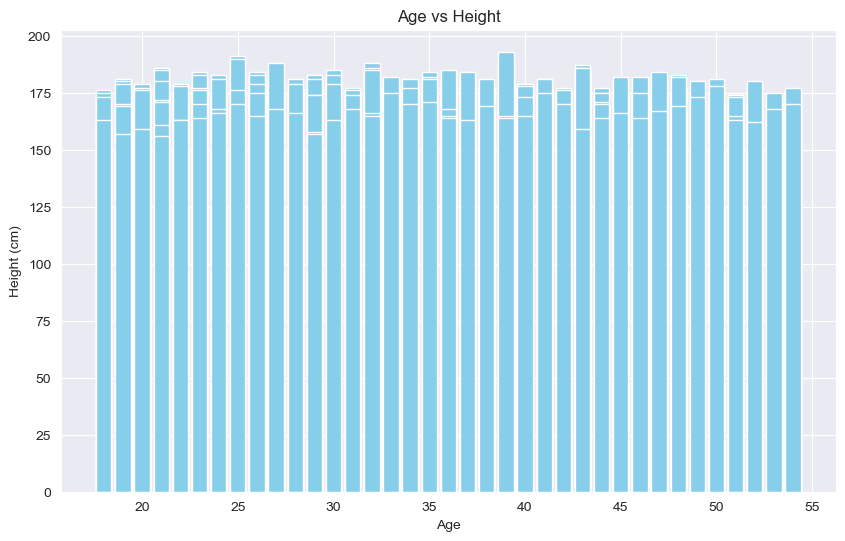

In [11]:
import matplotlib.pyplot as plt

# Create a bar chart comparing Age and Height
plt.figure(figsize=(10, 6))
plt.bar(df['Age'], df['Height'], color='skyblue')
plt.title('Age vs Height')
plt.xlabel('Age')
plt.ylabel('Height (cm)')
plt.grid(True)

# Show the plot
plt.show()

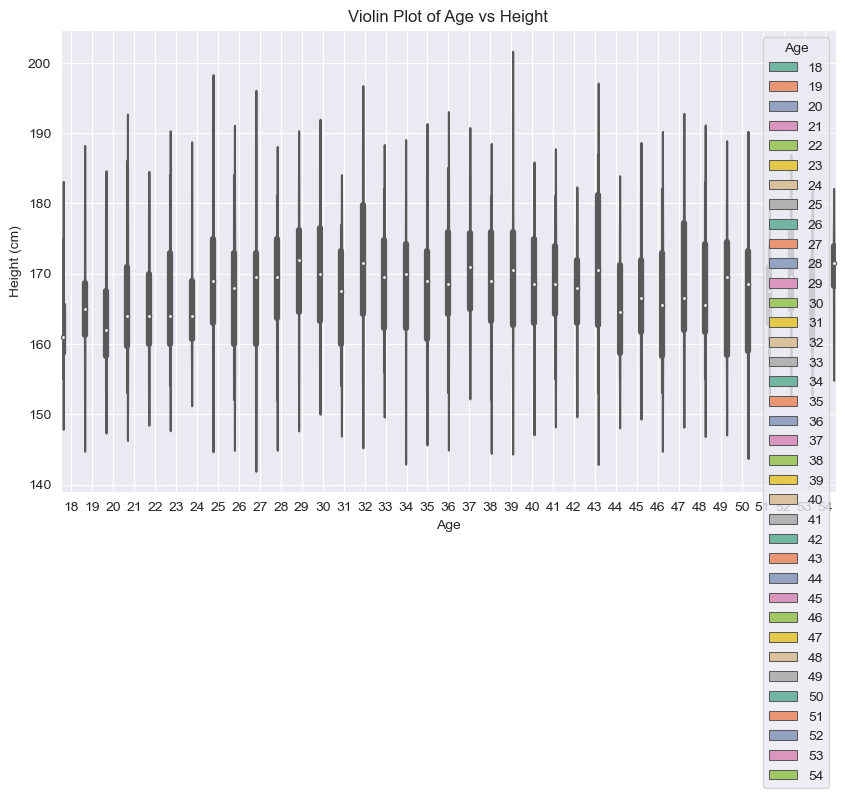

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot for Age and Height using seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x='Age', y='Height', data=df, hue='Age', palette='Set2', legend=False)
plt.title('Violin Plot of Age vs Height')
plt.xlabel('Age')
plt.ylabel('Height (cm)')
plt.grid(True)

# Show the violin plot
plt.show()

## exersice

In [6]:
# Select the "Age" column
col_data = df['Age'].astype(float)

# Calculate statistical values
mean_value = col_data.mean()
median_value = col_data.median()
std_value = col_data.std()

# Calculate IQR and bounds for outlier detection
Q1 = col_data.quantile(0.25)
Q3 = col_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (col_data < lower_bound) | (col_data > upper_bound)

# Output statistical values
print("Mean of column:", mean_value)
print("Median of column:", median_value)
print("Standard deviation of column:", std_value)

# Sort the data to find the lowest and highest values
sorted_data = col_data.sort_values().unique()
lowest_value = sorted_data[:3]
highest_value = sorted_data[-3:]

print("Three lowest values for column:", lowest_value)
print("Three highest values for column:", highest_value)

# Optionally, print outliers
print("Outliers in column:", col_data[outliers].values)

Mean of column: 33.11552795031056
Median of column: 32.0
Standard deviation of column: 9.835076045519793
Three lowest values for column: [18. 19. 20.]
Three highest values for column: [52. 53. 54.]
Outliers in column: []


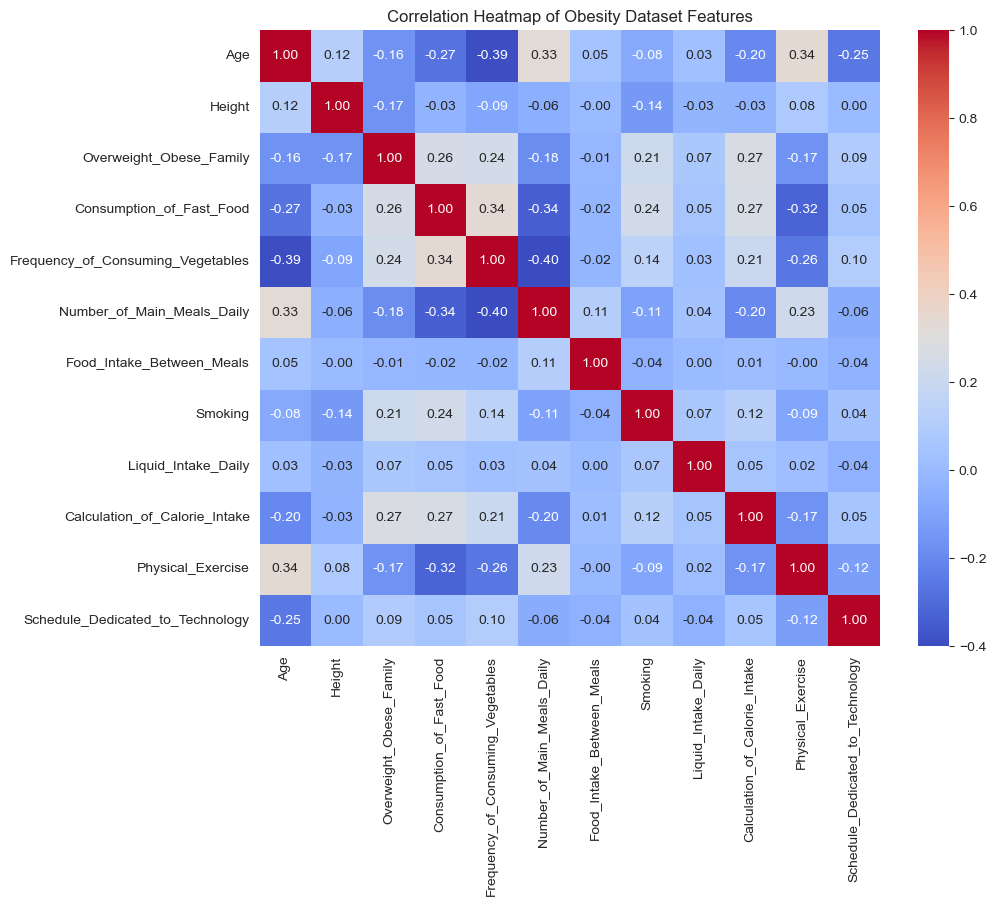

In [19]:
numeric_columns = [
    "Age", "Height", "Overweight_Obese_Family", "Consumption_of_Fast_Food",
    "Frequency_of_Consuming_Vegetables", "Number_of_Main_Meals_Daily",
    "Food_Intake_Between_Meals", "Smoking", "Liquid_Intake_Daily",
    "Calculation_of_Calorie_Intake", "Physical_Exercise",
    "Schedule_Dedicated_to_Technology"
]

# Compute the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Obesity Dataset Features")
plt.show()

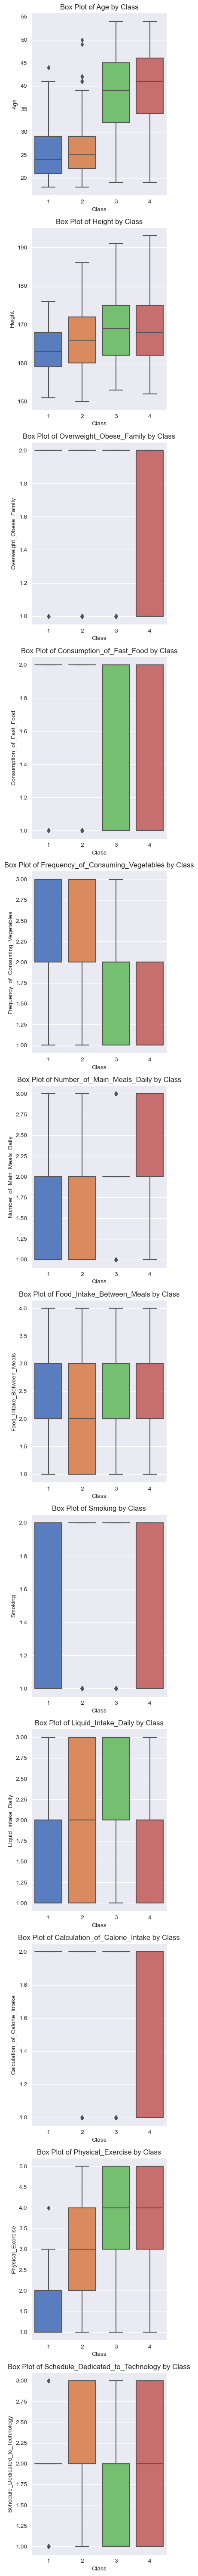

In [22]:
# Create boxplots for all numeric columns
plt.figure(figsize=(4, len(numeric_columns) * 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(data=df, x="Class", y=column, palette="muted")
    plt.title(f"Box Plot of {column} by Class")
    plt.xlabel("Class")
    plt.ylabel(column)

plt.tight_layout()
plt.show()